# Data Description: 
The file Credit Card.csv contains data on 50000 customers. The data include customer demographic information (age, income,Credit Cards etc.). Among these 50000 customers, only 41891 (82.8%) accepted the credit card that was offered to them in the earlier campaign.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aim

* Finding the costomers ..!
* Credit History : Eligibility can be determined by evaluating credit history of credit cards users. That means it can be done by looking at credit usage. This includes factore such as peyment history,credit cards activity , etc..
* We have people wondering who is a good card using and can we give them cards or not.


# Data Collection and Cleaning :

In [3]:
p1 = pd.read_csv("D:/Project 1/Creadit Cart Dataset 1.csv")

C:\Users\Saurav\AppData\Local\Temp\ipykernel_13396\1506723174.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  p1 = pd.read_csv("D:/Project 1/Creadit Cart Dataset 1.csv")


In [4]:
p1.shape

(49984, 25)

In [5]:
p1.columns = ('Month','Name','Age','Not REQ','Work','Annual Income','Inhand Salary($)','Bank Accounts','Credit Cards','Interest Rate($)','Loan($)','Loan Type','Due Date','Delayed Peyment','Changed Credit Limit','Inquiries','Behaviour','Debt','Not REQ','Years Of Use','Not REQ','EMI(M)','Invested(M)','Not REQ','Avai Balance($)')

In [6]:
p1.drop(columns=['Loan Type','Delayed Peyment','EMI(M)','Years Of Use','Changed Credit Limit','Not REQ','Not REQ','Not REQ','Not REQ','Annual Income','Inquiries','Due Date' ],inplace=True)

In [14]:
p1.head()

,Month,Name,Age,Work,Inhand Salary($),Bank Accounts,Credit Cards,Interest Rate($),Loan($),Behaviour,Debt,Invested(M),Avai Balance($)
0,September,Aaron Maashoh,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,Good,809.98,236.642682,186.266702
1,October,Aaron Maashoh,24.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,Good,809.98,21.465380,361.444004
2,November,Aaron Maashoh,24.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,Good,809.98,148.233938,264.675446
3,December,Aaron Maashoh,24.0,Scientist,NaN,3.0,4.0,3.0,4.0,Good,809.98,39.082511,343.826873
4,September,Rick Rothackerj,28.0,_______,3037.986667,2.0,4.0,6.0,1.0,Good,605.03,39.684018,485.298434


# Check The Null Values ...!

In [15]:
p1.isnull().mean()*100

Month                0.000000
Name                10.025208
Age                  0.256082
Work                 0.000000
Inhand Salary($)    15.056818
Bank Accounts        0.074024
Credit Cards         0.088028
Interest Rate($)     0.124040
Loan($)              0.076024
Behaviour            0.096031
Debt                 0.096031
Invested(M)          9.112916
Avai Balance($)      1.392446
dtype: float64

In [16]:
p1['Name'].nunique()

10154

In [17]:
p1['Name'].mode()

0    ODonnell
Name: Name, dtype: object

In [18]:
p1['Name']=p1['Name'].fillna('ODonnell')

# Find The Outliers And Filled  Values In LF & HF .

In [19]:
#Define A Outliers Form Dataset

def outliers(df, column):
    
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    higher_fence = q3 + 1.5 * iqr
    final_data = p1[(p1[column]>lower_fence) & (p1[column]<higher_fence)]
    df = final_data.copy()
    return lower_fence, higher_fence


In [20]:
outliers(p1,'Age')

(-2.0, 70.0)

In [21]:
outliers(p1,'Inhand Salary($)')

(-4823.002381125, 12361.818967875)

In [14]:
outliers(p1,'Bank Accounts')

(-3.0, 13.0)

In [22]:
outliers(p1,'Credit Cards')

(-0.5, 11.5)

In [23]:
outliers(p1,'Interest Rate($)')

(-10.0, 38.0)

In [24]:
outliers(p1,'Loan($)')

(-5.0, 11.0)

In [25]:
outliers(p1,'Debt')

(-1502.0700000000002, 4010.17)

In [26]:
outliers(p1,'Invested(M)')

(-174.855390675, 483.973601445)

In [27]:
def Out(p1):
    column_name = input("Enter Your Col Name : " )
    min_value = float(input("Enter Your Min Value: "))
    max_value = float(input("Enter Your Max Value: "))
    p1.loc[(p1[column_name] >= max_value) | (p1[column_name] <= min_value)].shape
    new_p1 = p1.loc[(p1[column_name] <= max_value) | (p1[column_name] >= min_value)]
    new_p1.loc[new_p1[column_name]>max_value,column_name] = max_value
    new_p1.loc[new_p1[column_name]<min_value,column_name] = min_value
    p1= new_p1.copy()
    return p1.shape

In [23]:
Out(p1)

Enter Your Col Name : Age
Enter Your Min Value: 18
Enter Your Max Value: 30


(49856, 13)

In [24]:
p1['Age'].min()

-500.0

In [28]:
#Find The Outliers and Then loc It From Age

p1.loc[(p1['Age'] >= 60) | (p1['Age'] <= 18)].shape
new_p1 = p1.loc[(p1['Age'] <= 60) | (p1['Age'] >= 18)]
new_p1.loc[new_p1['Age']>60,'Age'] = 60
new_p1.loc[new_p1['Age']<18,'Age'] = 18
p1= new_p1.copy()
print('new data : ',len(new_p1))
print('old data : ',len(p1))
print(p1.shape)
print()

#Find The Outliers and Then loc It From Inhand Salary(M)

p1.loc[(p1['Inhand Salary($)'] >= 12381) | (p1['Inhand Salary($)'] <= 0)].shape
new_p1 = p1.loc[(p1['Inhand Salary($)'] <= 12381) | (p1['Inhand Salary($)'] >= 0)]
new_p1.loc[new_p1['Inhand Salary($)']>12381,'Inhand Salary($)'] = 12381
new_p1.loc[new_p1['Inhand Salary($)']<0,'Inhand Salary($)'] = 0
p1= new_p1.copy()
print('new data : ',len(new_p1))
print('old data : ',len(p1))
print(p1.shape)
print()

#Find The Outliers and Then loc It From Bank Accounts

p1.loc[(p1['Bank Accounts'] >= 13) | (p1['Bank Accounts'] <= 0)].shape
new_p1 = p1.loc[(p1['Bank Accounts'] <= 13) | (p1['Bank Accounts'] >= 0)]
new_p1.loc[new_p1['Bank Accounts']>13,'Bank Accounts'] = 13
new_p1.loc[new_p1['Bank Accounts']<0,'Bank Accounts'] = 0
p1= new_p1.copy()
print('new data : ',len(new_p1))
print('old data : ',len(p1))
print(p1.shape)
print()

#Find The Outliers and Then loc It From Credit Cards

p1.loc[(p1['Credit Cards'] >= 10) | (p1['Credit Cards'] <= 0)].shape
new_p1 = p1.loc[(p1['Credit Cards'] <= 10) | (p1['Credit Cards'] >= 0)]
new_p1.loc[new_p1['Credit Cards']>10,'Credit Cards'] = 10
new_p1.loc[new_p1['Credit Cards']<0,'Credit Cards'] = 0
p1= new_p1.copy()
print('new data : ',len(new_p1))
print('old data : ',len(p1))
print(p1.shape)
print()

#Find The Outliers and Then loc It From Interest Rate

p1.loc[(p1['Interest Rate($)'] >= 38) | (p1['Interest Rate($)'] <= 0)].shape
new_p1 = p1.loc[(p1['Interest Rate($)'] <= 38) | (p1['Interest Rate($)'] >= 0)]
new_p1.loc[new_p1['Interest Rate($)']>38,'Interest Rate($)'] = 38
new_p1.loc[new_p1['Interest Rate($)']<0,'Interest Rate($)'] = 0
p1= new_p1.copy()
print('new data : ',len(new_p1))
print('old data : ',len(p1))
print(p1.shape)
print()

#Find The Outliers and Then loc It From Loan

p1.loc[(p1['Loan($)'] >= 11) | (p1['Loan($)'] <= 0)].shape
new_p1 = p1.loc[(p1['Loan($)'] <= 11) | (p1['Loan($)'] >= 0)]
new_p1.loc[new_p1['Loan($)']>11,'Loan($)'] = 11
new_p1.loc[new_p1['Loan($)']<0,'Loan($)'] = 0
p1= new_p1.copy()
print('new data : ',len(new_p1))
print('old data : ',len(p1))
print(p1.shape)
print()

#Find The Outliers and Then loc It From Avai Balance(M)

p1.loc[(p1['Avai Balance($)'] >= 772.056851175) | (p1['Avai Balance($)'] <= 0)].shape
new_p1 = p1.loc[(p1['Avai Balance($)'] <= 772.056851175) | (p1['Avai Balance($)'] >= 0)]
new_p1.loc[new_p1['Avai Balance($)']>772.056851175,'Avai Balance($)'] = 772.056851175
new_p1.loc[new_p1['Avai Balance($)']<0,'Avai Balance($)'] = 0
p1= new_p1.copy()
print('new data : ',len(new_p1))
print('old data : ',len(p1))
print(p1.shape)
print()

p1.loc[(p1['Debt'] >= 4010.17) | (p1['Debt'] <= 0)].shape
new_p1 = p1.loc[(p1['Debt'] <= 4010.17) | (p1['Debt'] >= 0)]
new_p1.loc[new_p1['Debt']>4010.17,'Debt'] = 4010.17
new_p1.loc[new_p1['Debt']<0,'Debt'] = 0
p1= new_p1.copy()
print('new data : ',len(new_p1))
print('old data : ',len(p1))
print(p1.shape)
print()

p1.loc[(p1['Invested(M)'] >= 483.973601445) | (p1['Invested(M)'] <= 0)].shape
new_p1 = p1.loc[(p1['Invested(M)'] <= 483.973601445) | (p1['Invested(M)'] >= 0)]
new_p1.loc[new_p1['Invested(M)']>483.973601445,'Invested(M)'] = 483.973601445
new_p1.loc[new_p1['Invested(M)']<0,'Invested(M)'] = 0
p1= new_p1.copy()
print('new data : ',len(new_p1))
print('old data : ',len(p1))
print(p1.shape)
print()

new data :  49856
old data :  49856
(49856, 13)

new data :  42373
old data :  42373
(42373, 13)

new data :  42373
old data :  42373
(42373, 13)

new data :  42373
old data :  42373
(42373, 13)

new data :  42373
old data :  42373
(42373, 13)

new data :  42373
old data :  42373
(42373, 13)

new data :  41891
old data :  41891
(41891, 13)

new data :  41891
old data :  41891
(41891, 13)

new data :  38209
old data :  38209
(38209, 13)



In [29]:
p1.isnull().mean()*100

Month               0.0
Name                0.0
Age                 0.0
Work                0.0
Inhand Salary($)    0.0
Bank Accounts       0.0
Credit Cards        0.0
Interest Rate($)    0.0
Loan($)             0.0
Behaviour           0.0
Debt                0.0
Invested(M)         0.0
Avai Balance($)     0.0
dtype: float64

In [30]:
p1['Work'] = p1['Work'].str.replace('_______','Engineer')
p1['Behaviour'] = p1['Behaviour'].str.replace('_','Good')
p1['Work'] = p1['Work'].str.replace('Mechanic','Engineer')
p1['Work'] = p1['Work'].str.replace('Media_Manager','Doctor')
p1['Work'] = p1['Work'].str.replace('Musician','Doctor')
p1['Work'] = p1['Work'].str.replace('Accountant','Scientist')
p1['Work'] = p1['Work'].str.replace('Journalist','Engineer')
p1['Work'] = p1['Work'].str.replace('Teacher','Manager')
p1['Loan($)'] = p1['Loan($)'].replace(3.0,0.0)
p1['Loan($)'] = p1['Loan($)'].replace(2.0,0.0)
p1['Loan($)'] = p1['Loan($)'].replace(1.0,0.0)
p1['Loan($)'] = p1['Loan($)'].replace(4.0,0.0)
p1['Loan($)'] = p1['Loan($)'].replace(5.0,224.0)
p1['Loan($)'] = p1['Loan($)'].replace(6.0,456.0)
p1['Loan($)'] = p1['Loan($)'].replace(7.0,423.0)
p1['Loan($)'] = p1['Loan($)'].replace(8.0,325.0)
p1['Loan($)'] = p1['Loan($)'].replace(9.0,120.0)
p1['Loan($)'] = p1['Loan($)'].replace(11.0,656.0)
p1['Inhand Salary($)'] = p1['Inhand Salary($)'].replace(12381.000000,524.0)

# Check The Data type Of Dataset...!

In [35]:
# change data type
p1['Age'] = p1['Age'].astype('int')
p1['Inhand Salary($)'] = p1['Inhand Salary($)'].astype('int')
p1['Bank Accounts'] = p1['Bank Accounts'].astype('int')
p1['Credit Cards'] = p1['Credit Cards'].astype('int')
p1['Interest Rate($)'] = p1['Interest Rate($)'].astype('int')
p1['Loan($)'] = p1['Loan($)'].astype('int')
p1['Debt'] = p1['Debt'].astype('int')
p1['Invested(M)'] = p1['Invested(M)'].astype('int')
p1['Avai Balance($)'] = p1['Avai Balance($)'].astype('int')

In [36]:
p1.dtypes

Month               object
Name                object
Age                  int32
Work                object
Inhand Salary($)     int32
Bank Accounts        int32
Credit Cards         int32
Interest Rate($)     int32
Loan($)              int32
Behaviour           object
Debt                 int32
Invested(M)          int32
Avai Balance($)      int32
dtype: object

# Describe The Dataset...!

In [37]:
p1.describe()

,Age,Inhand Salary($),Bank Accounts,Credit Cards,Interest Rate($),Loan($),Debt,Invested(M),Avai Balance($)
count,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000
mean,34.344055,3884.441650,5.457091,5.630061,14.916800,99.888115,1392.426496,171.408778,389.158183
std,11.139776,2885.665349,2.720413,2.153706,9.238665,169.464092,1078.837848,133.820612,175.819521
min,18.000000,303.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1554.000000,3.000000,4.000000,7.000000,0.000000,566.000000,71.000000,270.000000
50%,34.000000,2951.000000,6.000000,5.000000,13.000000,0.000000,1161.000000,127.000000,337.000000
75%,43.000000,5606.000000,7.000000,7.000000,20.000000,224.000000,1931.000000,230.000000,471.000000
max,60.000000,12378.000000,13.000000,10.000000,38.000000,656.000000,4010.000000,483.000000,772.000000


In [29]:
# Save to Excel file
p1.to_excel('D:/Project 1/Final_Dataset_PP.xlsx', index=False)

# Exploratory Data Analysis (EDA):

# Age...!

C:\Users\Saurav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


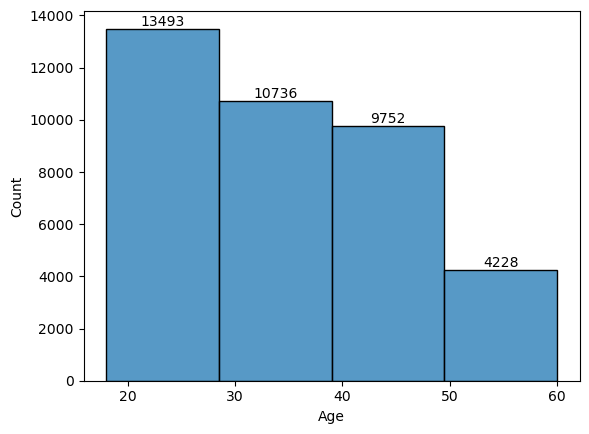

In [39]:
ax = sns.histplot(p1['Age'],bins=4)

for bars in ax.containers:
    ax.bar_label(bars)

In [40]:
pd.crosstab(p1['Month'],p1['Work'])

Work,Architect,Developer,Doctor,Engineer,Entrepreneur,Lawyer,Manager,Scientist,Writer
Month,,,,,,,,,
December,578,543,1842,2861,537,539,1050,1111,514
November,566,526,1834,2842,532,578,1054,1095,501
October,564,553,1850,2807,524,551,1089,1102,516
September,553,533,1844,2872,531,547,1073,1082,515


In [41]:
"""I have created a funtion based on credit cards and work .In which you can cheke Age,Credit cards,Loan,Debt,
Available Balance Any Base ."""

# Check Non Loan And Loan Type Costumer With Credit Cards :

def loan(p1):
    column_name = input("Enter column name (Age, Credit Cards, Inhand Salary($), Loan($), Debt, Avai Balance($)): ")#.strip()
    
    print()
    print(f"Your Min Values Of {column_name} Is : " , p1[column_name].min())
    print(f"Your Max Values Of {column_name} Is : " , p1[column_name].max())
    print()

    
    if column_name in p1.columns:
        min_value = float(input(f"Enter minimum value for {column_name}: "))
        max_value = float(input(f"Enter maximum value for {column_name}: "))
    
# Filter the dataset based on user input
    filtered_df = p1[(p1[column_name] >= min_value) & (p1[column_name] <= max_value)]
    print()
    print('filtered_df',filtered_df.shape)
# Plot the data
    sns.distplot(filtered_df[p1['Loan($)'] == 0]['Credit Cards'], hist=False, 
             label="Credit Card with NON personal loan")

    sns.distplot(filtered_df[p1['Loan($)'] >= 1]['Credit Cards'], hist=False,
             label="Credit Card with personal loan")

    plt.legend()
    plt.show()

Enter column name (Age, Credit Cards, Inhand Salary($), Loan($), Debt, Avai Balance($)): Credit Cards

Your Min Values Of Credit Cards Is :  0
Your Max Values Of Credit Cards Is :  10

Enter minimum value for Credit Cards: 1
Enter maximum value for Credit Cards: 5

filtered_df (19192, 13)


C:\Users\Saurav\AppData\Local\Temp\ipykernel_13396\3794488020.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.distplot(filtered_df[p1['Loan($)'] == 0]['Credit Cards'], hist=False,
C:\Users\Saurav\AppData\Local\Temp\ipykernel_13396\3794488020.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_df[p1['Loan($)'] == 0]['Credit Cards'], hist=False,
C:\Users\Saurav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mod

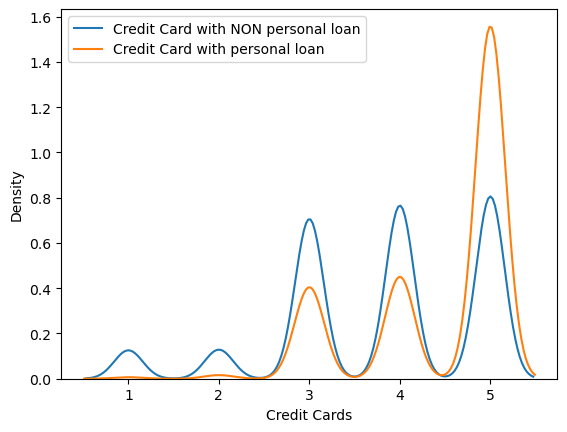

In [42]:
loan(p1)

In [43]:
"""I have created a funtion based on credit cards and work . In which you can cheke Age, Credit Cards, Loan, Debt ,Avai Balance
you can any base this point And You Also Check The Std, Mean , Min Value , First Quatile & Third Quatile Max Value.""" 

#Credit Cards With Work And You Also check the behaviour..

def plot(p1):
    column_name = input("Enter column name (Age, Credit Cards, Inhand Salary($), Loan($), Debt, Avai Balance($)): ")#.strip()
    
    print()
    print(f"Your Min Values Of {column_name} Is : " , p1[column_name].min())
    print(f"Your Max Values Of {column_name} Is : " , p1[column_name].max())
    print()
    
    if column_name in p1.columns:
        min_value = float(input(f"Enter minimum value for {column_name}: "))
        max_value = float(input(f"Enter maximum value for {column_name}: "))

        # Filter the DataFrame based on the user input
        
        filtered_df = p1[(p1[column_name] >= min_value) & (p1[column_name] <= max_value)]
        
        if not filtered_df.empty:
            print(f"\nShowing information for column: {column_name}\n")
            print(filtered_df[column_name].describe()) 
            print("\nFirst 5 rows of the filtered column:\n", filtered_df[column_name].head())
            
            filtered_df['Behaviour'].value_counts().plot(kind='pie',autopct='%0.1f')
            plt.title(f"Bahaviour of {column_name} {min_value}-{max_value} in this Range...!")
            
            plt.figure(figsize=(12, 6))
            sns.barplot(x='Credit Cards', y='Work', data=filtered_df, ci=None)
            plt.title(f'Credit Cards by Work for {column_name} {min_value}-{max_value}')
            plt.xlabel('Number of Credit Cards')
            plt.ylabel('Work')
            plt.show()
            
        else:
            print(f"No data found for {column_name} between {min_value} and {max_value}.")
    else:
        print(f"Column '{column_name}' not found in the DataFrame.")

Enter column name (Age, Credit Cards, Inhand Salary($), Loan($), Debt, Avai Balance($)): Credit Cards

Your Min Values Of Credit Cards Is :  0
Your Max Values Of Credit Cards Is :  10

Enter minimum value for Credit Cards: 1
Enter maximum value for Credit Cards: 5

Showing information for column: Credit Cards

count    19192.000000
mean         3.889902
std          1.084045
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Credit Cards, dtype: float64

First 5 rows of the filtered column:
 0    4
1    4
2    4
4    4
5    4
Name: Credit Cards, dtype: int32


C:\Users\Saurav\AppData\Local\Temp\ipykernel_13396\3137381744.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Credit Cards', y='Work', data=filtered_df, ci=None)


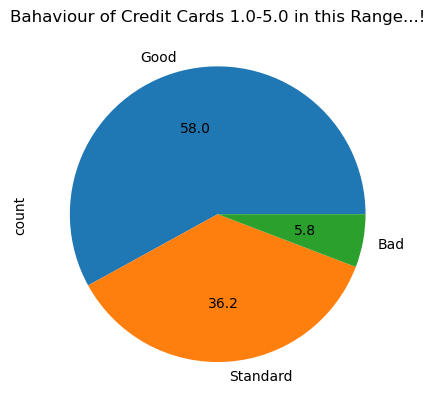

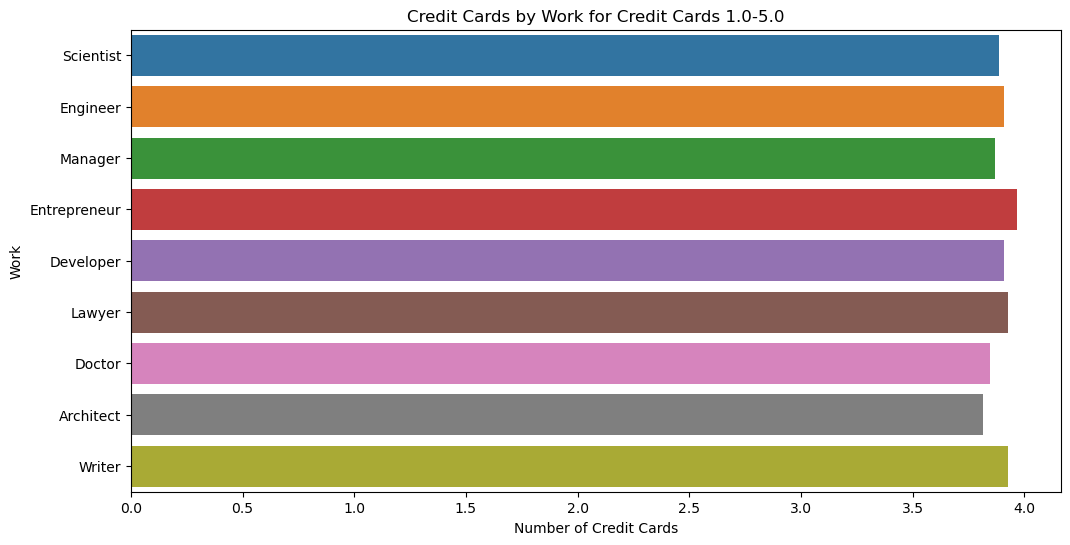

In [44]:
plot(p1)

In [45]:
def cards(Work,Credit_Cards):
    data = p1[ (p1['Work'] == Work) & (p1['Credit Cards'] > Credit_Cards)]
    print(f"Number of {Credit_Cards} Credit Cards Are Using {Work}...! : " , data.shape[0])

In [46]:
p1['Work'].unique()

array(['Scientist', 'Engineer', 'Manager', 'Entrepreneur', 'Developer',
       'Lawyer', 'Doctor', 'Writer', 'Architect'], dtype=object)

In [47]:
cards('Engineer',5)

Number of 5 Credit Cards Are Using Engineer...! :  5642


# Check The behaviour Based Credit Cards And Work...!

<Axes: ylabel='count'>

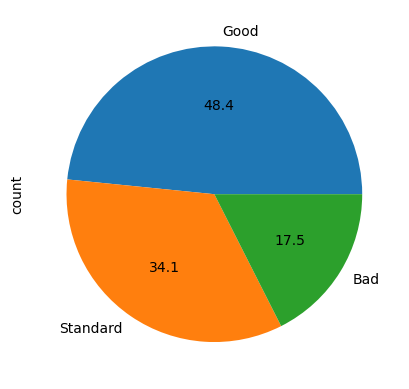

In [48]:
p1['Behaviour'].value_counts().plot(kind='pie',autopct='%0.1f')

In [1]:
# Check The Behavior Base :

def checking(p1):
    column_name = input("Enter column name (Age, Credit Cards, Inhand Salary($), Loan($), Debt, Avai Balance($)): ")#.strip()
    
    print()
    print(f"Your Min Values Of {column_name} Is : " , p1[column_name].min())
    print(f"Your Max Values Of {column_name} Is : " , p1[column_name].max())
    print()
    
    if column_name in p1.columns:
        min_value = float(input(f"Enter minimum value for {column_name}: "))
        max_value = float(input(f"Enter maximum value for {column_name}: "))

        # Filter the DataFrame based on the user input
    
    p2 = p1[(p1[column_name] >= min_value) & (p1[column_name] <= max_value)]
    Behavior = input("Enter Your Behavior (Good/Std/Bad) : ")
    if Behavior == 'Good':
        return p2[(p2['Behaviour'] == 'Good')][['Age', 'Behaviour', 'Work', 'Credit Cards']]
    elif Behavior == 'Std':
        return p2[(p2['Behaviour'] == 'Standard')][['Age', 'Behaviour', 'Work', 'Credit Cards']]
    elif Behavior == 'Bad':
        return p2[(p2['Behaviour'] == 'Bad')][['Age', 'Behaviour', 'Work', 'Credit Cards']]
    else:
        return "Enter Curret input"
    
    
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Work', y='Credit Cards', data=Behavior, ci=None)
    plt.title(f'Credit Cards by Work for {Behavior} Behaviour (Age {age}-{age1})')
    plt.xlabel('Work')
    plt.ylabel('Number of Credit Cards')
    plt.xticks(rotation=45)
    plt.show()

In [2]:
checking(p1)

NameError: name 'p1' is not defined

# Project Work :

1.Data Cleaning

2.Handle Outliers

3.Convert Categortical into Numerical

4.Data Fit

5.Exploratory Data Analysis (EDA):

# Conclusion 



* 2000 $ is the minimum salary required to get a credit card,
  Having a credit card helps to solve financial problems.



* If i look at age in my Age Column names , I hope that 19493 means 39 % of people between the ages of 18 of 28 are using cards and 61 % are between the ages of 28 to 60 .


* According to my dataset 37 % are Engineers and of them are 68 % are Good behievor. After that 26 % of 65 % Doctor's are Good ones. 

